##  fill the blank values in all columns with the column average


In [2]:
import pandas as pd

veri_seti = pd.read_excel("guncellenmis_dosya.xlsx")

veri_seti = veri_seti.fillna(veri_seti.mean(numeric_only=True))

# I checked the result
print(veri_seti.head())
veri_seti.to_excel('DatasetML_doldurulmus.xlsx', index=False)


  Öğrenci No  Cinsiyet  Doğum Yılı  Okul Türü  Sınıf Düzeyi  Baba Mesleği  \
0      1-100         1        92.0          3             9          12.0   
1      1-102         2        92.0          3             9          12.0   
2      1-103         2        92.0          3             9          11.0   
3      1-105         1        92.0          3             9          12.0   
4      1-106         2        92.0          3             9          15.0   

   Baba Eğitim Düzeyi  Anne Mesleği  Anne Eğitim Düzeyi  Kardeş Sayısı  ...  \
0                 2.0          12.0                 2.0            0.0  ...   
1                 3.0          14.0                 2.0            2.0  ...   
2                 5.0          14.0                 2.0            2.0  ...   
3                 4.0          12.0                 3.0            1.0  ...   
4                 3.0          14.0                 2.0            3.0  ...   

   c11  c12    CE  RO  AC  AE  CE-AC  RO-AE  lst  pass  
0  4.

# Extract new features. I used feature engineering methods and convert datasets into tabular dataset and create features.

In [3]:
import pandas as pd



veri_seti = pd.read_excel('DatasetML_doldurulmus.xlsx')

# Sınav Başarısı Oranı fonksiyonu
def sinav_basari_orani(s9, s10, s11):
    return (s9 + s10 + s11) / 3

# "Sınav Başarısı Oranı" sütunu oluşturma
veri_seti['Sınav Başarısı Oranı'] = veri_seti.apply(lambda row: sinav_basari_orani(row['Sınıf 9 Notu'], row['Sınıf 10 Notu'], row['Sınıf 11 Notu']), axis=1)

# Güncellenmiş veri setini kaydetme
veri_seti.to_excel('veri_seti_eklenmis.xlsx', index=False)

df = pd.DataFrame(veri_seti)

# Display the tabular dataset
print(df)


    Öğrenci No  Cinsiyet  Doğum Yılı  Okul Türü  Sınıf Düzeyi  Baba Mesleği  \
0        1-100         1        92.0          3             9          12.0   
1        1-102         2        92.0          3             9          12.0   
2        1-103         2        92.0          3             9          11.0   
3        1-105         1        92.0          3             9          12.0   
4        1-106         2        92.0          3             9          15.0   
..         ...       ...         ...        ...           ...           ...   
973     14-x42         1        89.0          2            11          20.0   
974     14-x43         2        89.0          2            11           4.0   
975     14-x44         1        89.0          2            11          11.0   
976     14-x45         1        90.0          2            11           1.0   
977     14-x46         1        89.0          2            11          16.0   

     Baba Eğitim Düzeyi  Anne Mesleği  Anne Eğitim 

# Show standardization of each inputs and outputs.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veri setini oku
veri_seti = pd.read_excel('veri_seti_eklenmis.xlsx')
# Verilerin standardizasyonunu yap
scaler = StandardScaler()
standardize_veri = scaler.fit_transform(veri_seti)

# Standardize edilmiş veriyi yeni bir DataFrame'e dönüştür
standardize_veri_df = pd.DataFrame(standardize_veri, columns=veri_seti.columns)

# Yeni Excel dosyasına kaydet
standardize_veri_df.to_excel('DatasetML_standardize_edilmis_veri.xlsx', index=False)

df = pd.DataFrame(standardize_veri_df)

# Display the tabular dataset
print(df)

     Cinsiyet  Doğum Yılı  Okul Türü  Sınıf Düzeyi  Baba Mesleği  \
0   -1.012346    0.518110   0.392387     -1.260895     -0.119933   
1    0.987804    0.518110   0.392387     -1.260895     -0.119933   
2    0.987804    0.518110   0.392387     -1.260895     -0.252821   
3   -1.012346    0.518110   0.392387     -1.260895     -0.119933   
4    0.987804    0.518110   0.392387     -1.260895      0.278730   
..        ...         ...        ...           ...           ...   
973 -1.012346   -0.535728  -0.390785      1.411164      0.943170   
974  0.987804   -0.535728  -0.390785      1.411164     -1.183036   
975 -1.012346   -0.535728  -0.390785      1.411164     -0.252821   
976 -1.012346   -0.184449  -0.390785      1.411164     -1.581700   
977 -1.012346   -0.535728  -0.390785      1.411164      0.411618   

     Baba Eğitim Düzeyi  Anne Mesleği  Anne Eğitim Düzeyi  Kardeş Sayısı  \
0             -1.549884     -0.328073           -0.915173      -1.691700   
1             -0.715730      0.

# Make plots (histograms, barhcarts, scatter, violin) that describe the behavior of input data versus output data.

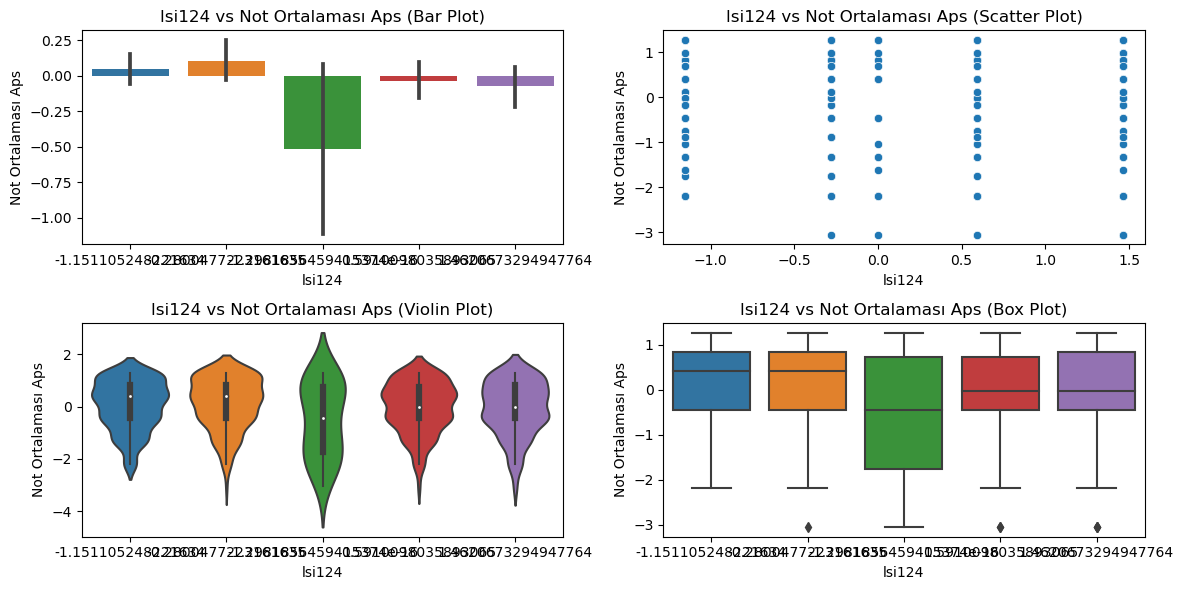

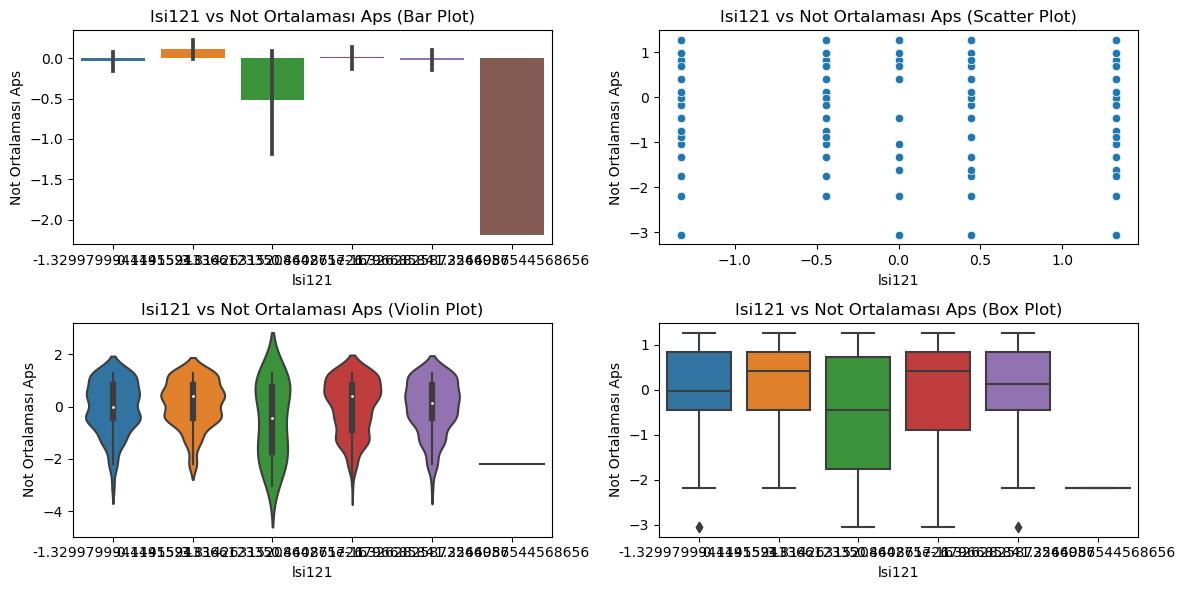

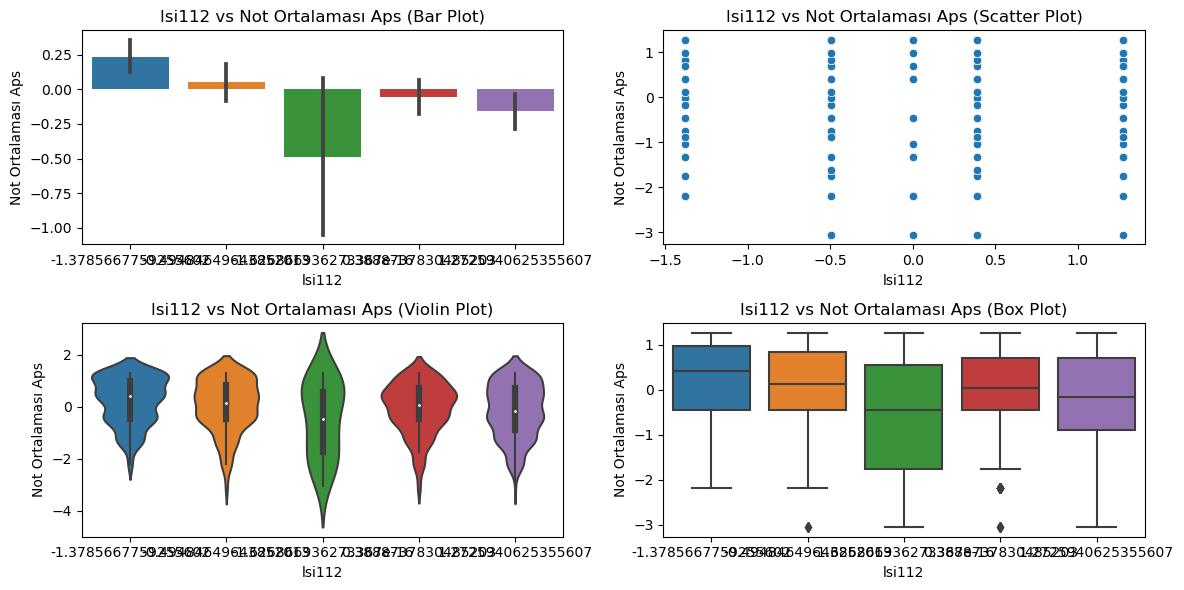

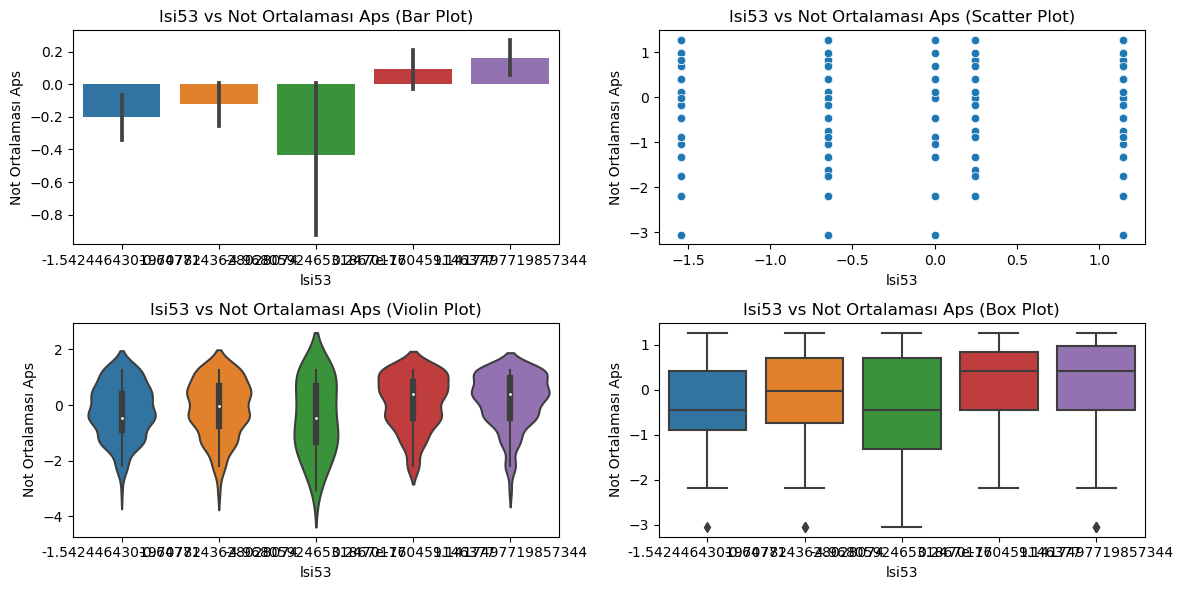

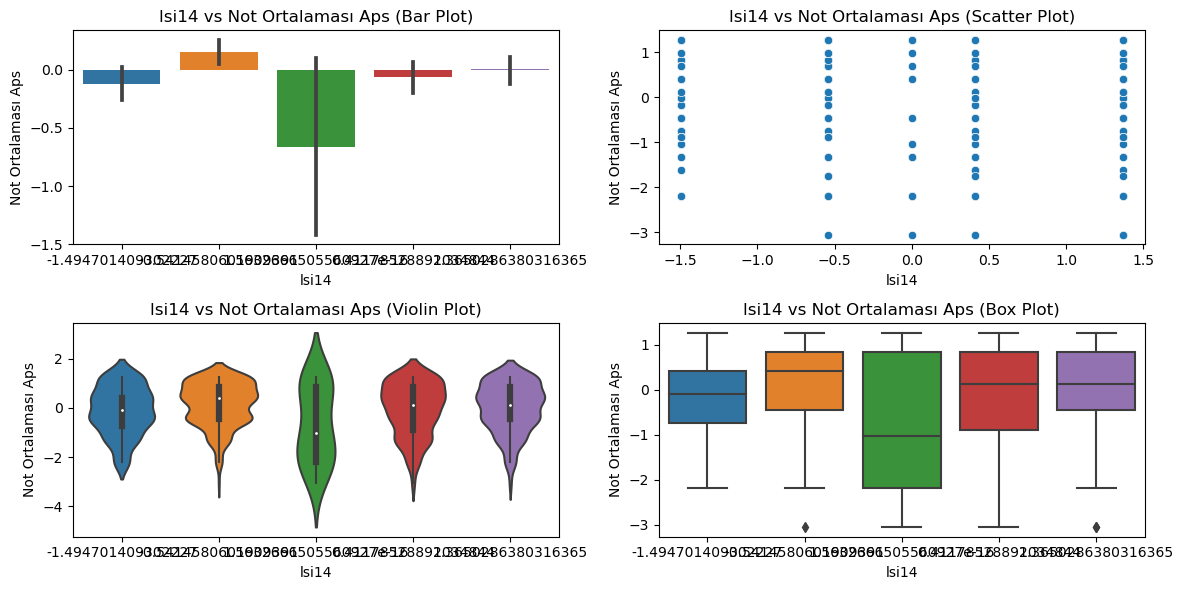

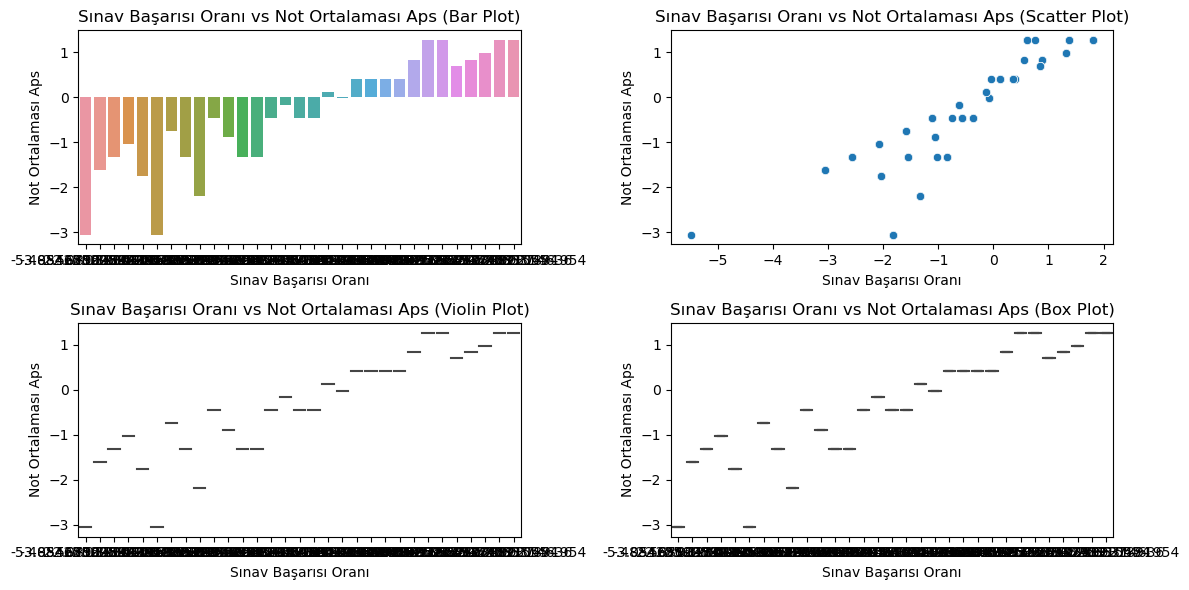

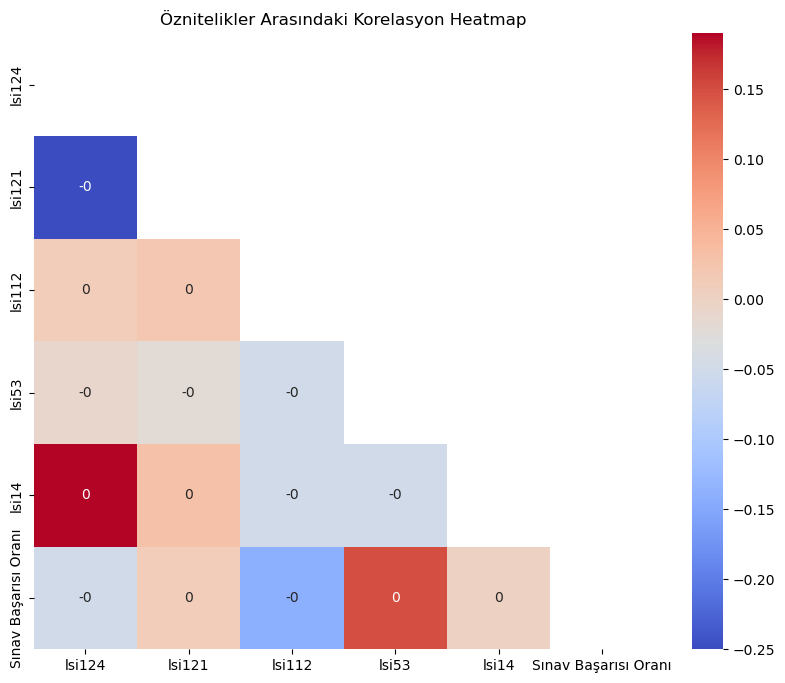

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Veri setini yükle
data = pd.read_excel("DatasetML_standardize_edilmis_veri.xlsx")

# Öznitelikleri ve hedef değişkeni ayır
X = data[['lsi124', 'lsi121', 'lsi112','lsi53','lsi14','Sınav Başarısı Oranı']]  # Seçilen sütunlar
y = data['Not Ortalaması aps']  # Çıktı değişkeni

# Veri setini standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standartlaştırılmış veriyi DataFrame'e dönüştür
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Her bir sütun için farklı grafik türleri ile görselleştirme
for column in X_scaled_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Bar plot
    plt.subplot(2, 2, 1)
    sns.barplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Not Ortalaması Aps')
    plt.title(f'{column} vs Not Ortalaması Aps (Bar Plot)')

    # Scatter plot
    plt.subplot(2, 2, 2)
    sns.scatterplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Not Ortalaması Aps')
    plt.title(f'{column} vs Not Ortalaması Aps (Scatter Plot)')

    # Violin plot
    plt.subplot(2, 2, 3)
    sns.violinplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Not Ortalaması Aps')
    plt.title(f'{column} vs Not Ortalaması Aps (Violin Plot)')

    # Box plot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Not Ortalaması Aps')
    plt.title(f'{column} vs Not Ortalaması Aps (Box Plot)')

    plt.tight_layout()
    plt.show()

# Öznitelikler arasındaki ilişkiyi gösteren heatmap
plt.figure(figsize=(10, 8))
corr = X_scaled_df.corr().round(2)
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, fmt=".0f")
plt.title('Öznitelikler Arasındaki Korelasyon Heatmap')
plt.show()


## Extract statistical information of each input and outputs of datasets


In [8]:
import pandas as pd

veri = pd.read_excel('veri_seti_eklenmis.xlsx')

istatistikler = veri.describe()

print(istatistikler)

         Cinsiyet  Doğum Yılı   Okul Türü  Sınıf Düzeyi  Baba Mesleği  \
count  978.000000  978.000000  978.000000    978.000000    978.000000   
mean     1.506135   90.525077    2.498978      9.943763     12.902516   
std      0.500218    2.848195    1.277512      0.748869      7.528991   
min      1.000000    9.000000    1.000000      9.000000      1.000000   
25%      1.000000   90.000000    1.000000      9.000000     10.250000   
50%      2.000000   91.000000    3.000000     10.000000     12.000000   
75%      2.000000   92.000000    3.000000     11.000000     16.000000   
max      2.000000   93.000000    5.000000     11.000000     52.000000   

       Baba Eğitim Düzeyi  Anne Mesleği  Anne Eğitim Düzeyi  Kardeş Sayısı  \
count          978.000000    978.000000          978.000000     978.000000   
mean             3.858031     13.627451            3.130524       1.563655   
std              1.199433      4.963171            1.235944       0.924783   
min              0.000000     

## Model training for regression problem

In [5]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import joblib

# Veri setini yükle
data = pd.read_excel('veri_seti_eklenmis.xlsx')

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop(columns=["Not Ortalaması aps", "lst","pass"])
y = data["Not Ortalaması aps"]

# Kullanılacak modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
}

# Her model için performansı değerlendir ve en iyisini seç
best_model = None
best_score = float('-inf')
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    mean_r2 = cv_scores.mean()
    print(f"{name} cross-validation mean R^2 score:", mean_r2)
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model = model

# En iyi modeli eğit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
best_model.fit(X_train, y_train)

# Eğitim setinde performansı değerlendir
train_predictions = best_model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = sqrt(train_mse)
print("\nEğitim Seti Performansı:")
print("R^2 değeri:", train_r2)
print("MSE (Ortalama Kare Hata):", train_mse)
print("MAE (Ortalama Mutlak Hata):", train_mae)
print("RMSE (Kök Ortalama Kare Hata):", train_rmse)

# Test setinde performansı değerlendir
test_predictions = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = sqrt(test_mse)
print("\nTest Seti Performansı:")
print("R^2 değeri:", test_r2)
print("MSE (Ortalama Kare Hata):", test_mse)
print("MAE (Ortalama Mutlak Hata):", test_mae)
print("RMSE (Kök Ortalama Kare Hata):", test_rmse)

# En iyi modeli kaydet
joblib.dump(best_model, 'best_model_isedataset_regression.pkl')


Linear Regression cross-validation mean R^2 score: 0.8650749700100111
Ridge Regression cross-validation mean R^2 score: 0.8676245260769916
Lasso Regression cross-validation mean R^2 score: 0.04985588471760558

Eğitim Seti Performansı:
R^2 değeri: 0.9539034654777496
MSE (Ortalama Kare Hata): 0.06283740006872617
MAE (Ortalama Mutlak Hata): 0.1941272470261759
RMSE (Kök Ortalama Kare Hata): 0.25067389187692873

Test Seti Performansı:
R^2 değeri: 0.9063713119999174
MSE (Ortalama Kare Hata): 0.1130606676082607
MAE (Ortalama Mutlak Hata): 0.2505700703864474
RMSE (Kök Ortalama Kare Hata): 0.33624495179594993


['best_model_isedataset_regression.pkl']

## Model training for classification problem

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# Veri setini yükle
data = pd.read_excel('veri_seti_eklenmis.xlsx')

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop(columns=["Not Ortalaması aps", "lst","pass"])
y = data["lst"]

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
    return scores.mean()

results = {}

# Evaluate models, split the dataset, and print both mean accuracy and test accuracy
for name, model in models.items():
    # Split the dataset for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)
    # Evaluate the model using cross-validation
    mean_accuracy = evaluate_model(model, X_train, y_train)

    # Train the model on the training set
    model.fit(X_train, y_train)
    # Calculate the test accuracy
    test_accuracy = model.score(X_test, y_test)
    results[name] = test_accuracy
    # Print both mean accuracy and test accuracy
    print(f"{name} cross-validation mean accuracy score:", mean_accuracy)
    print(f"{name} test accuracy score:", test_accuracy)

# Select the best performing model based on mean accuracy
best_model = max(results, key=results.get)
print("Best performing model based on test accuracy:", best_model)

# Split the dataset for testing using the best model with specified random seed and stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)

# Train the best model
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
test_accuracy = best_model_instance.score(X_test, y_test)
print("Test set accuracy score (best model):", test_accuracy)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set accuracy:", test_accuracy)
print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)

joblib.dump(best_model, 'best_model_isedataset_classification.pkl')



Naive Bayes cross-validation mean accuracy score: 0.7965108730931515
Naive Bayes test accuracy score: 0.7959183673469388
Random Forest cross-validation mean accuracy score: 0.9654657578708212
Random Forest test accuracy score: 0.9693877551020408
SVM cross-validation mean accuracy score: 0.860548523206751
SVM test accuracy score: 0.8877551020408163
Best performing model based on test accuracy: Random Forest
Test set accuracy score (best model): 0.9693877551020408

Evaluation metric scores for best model which is Random Forest:
Test set accuracy: 0.9693877551020408
Test set precision: 0.9702698243476494
Test set recall: 0.9693877551020408
Test set F1 score: 0.9682267565490817


['best_model_isedataset_classification.pkl']

## Model training for regression problem

In [6]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import joblib

# Veri setini yükle
data = pd.read_excel('veri_seti_eklenmis.xlsx')

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop(columns=["Not Ortalaması aps", "lst","pass"])
y = data["pass"]

# Kullanılacak modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet()
}

# Her model için performansı değerlendir ve en iyisini seç
best_model = None
best_score = float('-inf')
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    mean_r2 = cv_scores.mean()
    print(f"{name} cross-validation mean R^2 score:", mean_r2)
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model = model

# En iyi modeli eğit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
best_model.fit(X_train, y_train)

# Eğitim setinde performansı değerlendir
train_predictions = best_model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = sqrt(train_mse)
print("\nEğitim Seti Performansı:")
print("R^2 değeri:", train_r2)
print("MSE (Ortalama Kare Hata):", train_mse)
print("MAE (Ortalama Mutlak Hata):", train_mae)
print("RMSE (Kök Ortalama Kare Hata):", train_rmse)

# Test setinde performansı değerlendir
test_predictions = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = sqrt(test_mse)
print("\nTest Seti Performansı:")
print("R^2 değeri:", test_r2)
print("MSE (Ortalama Kare Hata):", test_mse)
print("MAE (Ortalama Mutlak Hata):", test_mae)
print("RMSE (Kök Ortalama Kare Hata):", test_rmse)

# En iyi modeli kaydet
joblib.dump(best_model, 'best_model_isedataset_regression.pkl')


Linear Regression cross-validation mean R^2 score: 0.9925650773923678
Ridge Regression cross-validation mean R^2 score: 0.9926207849411994
Lasso Regression cross-validation mean R^2 score: 0.9863922226731745
ElasticNet Regression cross-validation mean R^2 score: 0.9889003461466386

Eğitim Seti Performansı:
R^2 değeri: 0.9964965679904211
MSE (Ortalama Kare Hata): 2.3312384251485563
MAE (Ortalama Mutlak Hata): 0.8833538512111621
RMSE (Kök Ortalama Kare Hata): 1.5268393580035053

Test Seti Performansı:
R^2 değeri: 0.9918866687910413
MSE (Ortalama Kare Hata): 5.174985754532176
MAE (Ortalama Mutlak Hata): 1.2432317249990998
RMSE (Kök Ortalama Kare Hata): 2.2748595021522044


['best_model_isedataset_regression.pkl']